# Data Collection - Part2

## Load needed Libraries and modules

In [1]:
# import Libs
import pandas as pd
import datetime as dt
import pytz
import os
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# import modules
from datetime import datetime, timezone
from datetime import date, time
from math import trunc
from dateutil.parser import parse

## Loading the Data needed into Dataframes

### Load the csv files

In [2]:
mb_src_prices = pd.read_csv("mb_tickerdf04152024 2024-04-15 09-39-43-558192.csv", index_col=0)
mb_src_options = pd.read_csv("mb_all_options_data04152024 2024-04-15 09-39-46-200765.csv", index_col=0)
mb_src_ir = pd.read_csv("mb_US_T_04152024 2024-04-15 09-39-46-240619.csv", index_col=0)

# Parsing the dates in the index and convert them to date only (without time or timezone info)
mb_src_prices.index = mb_src_prices.index.map(lambda x: parse(x).date())

print(mb_src_prices)
print(mb_src_options)
print(mb_src_ir)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2019-04-15   47.793186   48.098844   47.656000   47.949623   70146400   
2019-04-16   48.004988   48.464674   47.788379   47.954445  102785600   
2019-04-17   48.024227   48.948421   47.800402   48.888252  115627200   
2019-04-18   48.885853   49.133747   48.741450   49.063953   96783200   
2019-04-22   48.816066   49.323890   48.698134   49.225212   77758000   
...                ...         ...         ...         ...        ...   
2024-04-09  168.699997  170.080002  168.350006  169.669998   42451200   
2024-04-10  168.800003  169.089996  167.110001  167.779999   49709300   
2024-04-11  168.339996  175.460007  168.160004  175.039993   91070300   
2024-04-12  174.259995  178.360001  174.210007  176.550003  101593300   
2024-04-15  175.380005  175.979904  173.850006  174.309998    6930960   

            Dividends  Stock Splits  
Date        

### Prices

In [3]:
# Copy Sources Data DataFrame
mb_prices = mb_src_prices.copy()

# Drop the unwanted columns from the DataFrame
mb_prices = mb_prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)

# Format the index to display only the date in 'yyyy-mm-dd' format
mb_prices.index = pd.to_datetime(mb_prices.index).strftime('%Y-%m-%d')

# Rename the 'Close' column to 'AAPL'
mb_prices = mb_prices.rename(columns={'Close': 'AAPL'})

# Print the updated DataFrame with formatted index
mb_prices

,AAPL
Date,
2019-04-15,47.949623
2019-04-16,47.954445
2019-04-17,48.888252
2019-04-18,49.063953
2019-04-22,49.225212
...,...
2024-04-09,169.669998
2024-04-10,167.779999
2024-04-11,175.039993


### Prices table enriched

In [4]:
# Calculating the log returns
mb_prices['Log Returns'] = np.log(mb_prices['AAPL'] / mb_prices['AAPL'].shift(1))

# Number of trading days in a year
trading_days = 252

# Calculating the 1-year rolling volatility
mb_prices['1y Historical Volatility'] = mb_prices['Log Returns'].rolling(window=trading_days).std() * np.sqrt(trading_days)

# Drop the 'Log Returns' column as we don't need it anymore
mb_prices = mb_prices.drop(columns=['Log Returns'])

mb_prices

,AAPL,1y Historical Volatility
Date,,
2019-04-15,47.949623,NaN
2019-04-16,47.954445,NaN
2019-04-17,48.888252,NaN
2019-04-18,49.063953,NaN
2019-04-22,49.225212,NaN
...,...,...
2024-04-09,169.669998,0.192724
2024-04-10,167.779999,0.192372
2024-04-11,175.039993,0.196785


In [5]:
mb_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2019-04-15 to 2024-04-15
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AAPL                      1259 non-null   float64
 1   1y Historical Volatility  1007 non-null   float64
dtypes: float64(2)
memory usage: 29.5+ KB


In [6]:
mb_prices.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,1259.0,129.262428,44.316131,41.869549,93.091309,140.811310,165.765427,197.857529
1y Historical Volatility,1007.0,0.324350,0.077537,0.188945,0.262857,0.317068,0.357743,0.474597


<Figure size 1200x600 with 0 Axes>

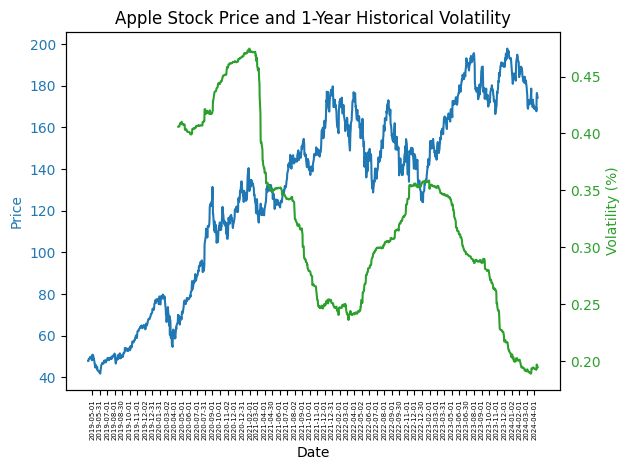

In [7]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 6))  # Adjusted for potentially better display

# Ensure the index is in datetime format (if not already done)
mb_prices.index = pd.to_datetime(mb_prices.index)

# Plotting the Apple stock price and historical volatility
fig, ax1 = plt.subplots()

# Create a second y-axis for the volatility
ax2 = ax1.twinx()

# Apple stock prices on the primary y-axis
color1 = 'tab:blue'
ax1.plot(mb_prices.index, mb_prices['AAPL'], label='AAPL Stock Price', color=color1)
ax1.set_xlabel('Date', fontsize=10)  # Smaller font size for the x-axis label
ax1.set_ylabel('Price', color=color1, fontsize=10)  # Smaller font size for the y-axis label
ax1.tick_params(axis='y', labelcolor=color1)

# 1-year Historical Volatility on the secondary y-axis
color2 = 'tab:green'
ax2.plot(mb_prices.index, mb_prices['1y Historical Volatility'], label='1y Historical Volatility', color=color2)
ax2.set_ylabel('Volatility (%)', color=color2, fontsize=10)  # Smaller font size for the y-axis label
ax2.tick_params(axis='y', labelcolor=color2)

# Title and grid
plt.title('Apple Stock Price and 1-Year Historical Volatility', fontsize=12)  # Smaller font size for the title

# Generate a range of the first of each month from the min to max date in the index
first_of_month = pd.date_range(start=mb_prices.index.min(), end=mb_prices.index.max(), freq='MS')

# Find the closest real data points to these dates in the DataFrame
nearest_trading_days = [mb_prices.index[np.argmin(np.abs(mb_prices.index - date))] for date in first_of_month]

# Setting x-tick labels with the full day displayed
ax1.set_xticks(nearest_trading_days)
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in nearest_trading_days], rotation=90, fontsize=5)  # Smaller font size for x-tick labels

# Adjust plot parameters to give some padding and display the plot
fig.tight_layout()  # Adjust layout to fit everything neatly

plt.show()

<Figure size 2000x500 with 0 Axes>

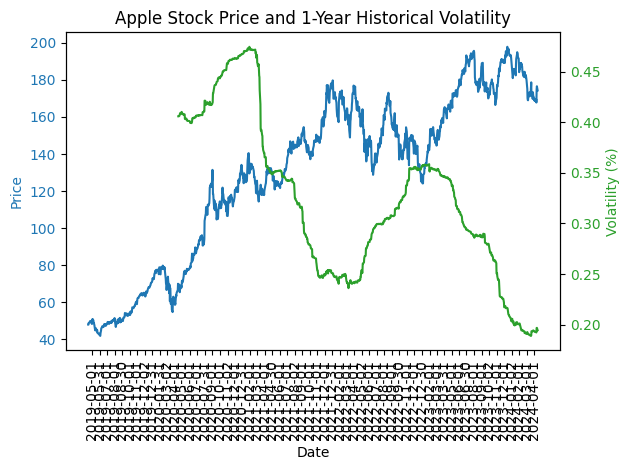

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the figure size for better visibility
plt.figure(figsize=(20, 5))  # Adjusted for potentially better display

# Ensure the index is in datetime format (if not already done)
mb_prices.index = pd.to_datetime(mb_prices.index)

# Plotting the Apple stock price and historical volatility
fig, ax1 = plt.subplots()

# Create a second y-axis for the volatility
ax2 = ax1.twinx()

# Apple stock prices on the primary y-axis
color1 = 'tab:blue'
ax1.plot(mb_prices.index, mb_prices['AAPL'], label='AAPL Stock Price', color=color1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# 1-year Historical Volatility on the secondary y-axis
color2 = 'tab:green'
ax2.plot(mb_prices.index, mb_prices['1y Historical Volatility'], label='1y Historical Volatility', color=color2)
ax2.set_ylabel('Volatility (%)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title and grid
plt.title('Apple Stock Price and 1-Year Historical Volatility')

# Generate a range of the first of each month from the min to max date in the index
first_of_month = pd.date_range(start=mb_prices.index.min(), end=mb_prices.index.max(), freq='MS')

# Find the closest real data points to these dates in the DataFrame
nearest_trading_days = [mb_prices.index[np.argmin(np.abs(mb_prices.index - date))] for date in first_of_month]

# Setting x-tick labels with the full day displayed
ax1.set_xticks(nearest_trading_days)
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in nearest_trading_days], rotation=90)  # Ensure rotation is set to 90

# Adjust plot parameters to give some padding and display the plot
fig.tight_layout()  # Adjust layout to fit everything neatly

plt.show()


### Options details

In [9]:
# Copy Sources Data DataFrame
mb_options = mb_src_options.copy()

# Drop the unwanted columns from the DataFrame
mb_options = mb_options.drop(['bid', 'ask', 'change', 'percentChange', 'volume', 'openInterest', 'contractSize'], axis=1)

# Print the updated DataFrame with formatted index
mb_options

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,inTheMoney,currency,OptionType,expirationDate,time_to_expiration
0,AAPL240419C00005000,2024-04-12 13:51:51+00:00,5.0,173.00,0.00001,True,USD,Call,2024-04-19,3
1,AAPL240419C00010000,2024-03-27 19:35:59+00:00,10.0,163.00,0.00001,True,USD,Call,2024-04-19,3
2,AAPL240419C00015000,2024-04-04 14:55:59+00:00,15.0,155.95,0.00001,True,USD,Call,2024-04-19,3
3,AAPL240419C00030000,2024-03-27 15:14:12+00:00,30.0,142.65,0.00001,True,USD,Call,2024-04-19,3
4,AAPL240419C00035000,2024-04-12 14:02:42+00:00,35.0,142.43,0.00001,True,USD,Call,2024-04-19,3
...,...,...,...,...,...,...,...,...,...,...
1910,AAPL261218P00210000,2024-04-12 17:59:06+00:00,210.0,39.98,0.00001,True,USD,Put,2026-12-18,976
1911,AAPL261218P00220000,2024-04-11 19:36:50+00:00,220.0,46.72,0.00001,True,USD,Put,2026-12-18,976
1912,AAPL261218P00230000,2024-04-11 17:17:27+00:00,230.0,58.15,0.00001,True,USD,Put,2026-12-18,976
1913,AAPL261218P00280000,2024-04-11 18:22:04+00:00,280.0,106.00,0.00001,True,USD,Put,2026-12-18,976


### Implied Volatilities

In [10]:
# Take a Copy of the Options DataFrame
df = mb_options.copy()

# Filter for call options and create a pivot table
mb_call_options = df[df['OptionType'] == 'Call']
mb_call_iv_matrix = mb_call_options.pivot(index='time_to_expiration', columns='strike', values='impliedVolatility')

# Filter for put options and create a pivot table
mb_put_options = df[df['OptionType'] == 'Put']
mb_put_iv_matrix = mb_put_options.pivot(index='time_to_expiration', columns='strike', values='impliedVolatility')

# Fill NaN values with zero (optional)
mb_call_iv_matrix = mb_call_iv_matrix.fillna(0)
mb_put_iv_matrix = mb_put_iv_matrix.fillna(0)

# Sort the index and columns (optional)
mb_call_iv_matrix.sort_index(axis=0, inplace=True)
mb_call_iv_matrix.sort_index(axis=1, inplace=True)

mb_put_iv_matrix.sort_index(axis=0, inplace=True)
mb_put_iv_matrix.sort_index(axis=1, inplace=True)

In [11]:
print("\nCall implied volatility matrix:")
mb_call_iv_matrix


Call implied volatility matrix:


strike,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,...,300.0,305.0,310.0,320.0,330.0,340.0,350.0,360.0,370.0,380.0
time_to_expiration,,,,,,,,,,,,,,,,,,,,,
3,0.00001,0.00001,0.00001,0.000000,0.00000,0.000010,0.00001,10.823245,0.00001,0.00001,...,0.500005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
31,0.00001,0.00000,0.00000,0.000000,0.00001,0.000000,0.00000,0.000000,0.00000,0.00001,...,0.250007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
38,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
45,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66,0.00001,0.00001,0.00001,6.491213,4.63184,0.000010,0.00001,3.424562,0.00000,0.00001,...,0.250007,0.000000,0.250007,0.250007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
94,0.00001,0.00001,0.00000,0.000000,0.00001,0.000000,0.00001,0.000000,0.00000,0.00001,...,0.250007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
print("\nPut implied volatility matrix:")
mb_put_iv_matrix


Put implied volatility matrix:


strike,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,...,280.0,285.0,290.0,295.0,300.0,305.0,310.0,320.0,350.0,370.0
time_to_expiration,,,,,,,,,,,,,,,,,,,,,
3,9.500004,0.500005,0.000000,0.500005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.163576,0.000000,0.000000,0.00000,2.908694,0.00000,0.000000,0.00000,0.00000,0.00000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
31,0.000000,0.000000,0.000000,0.500005,0.000000,1.875001,0.000000,0.000000,0.000000,1.343753,...,0.000000,0.000000,0.000000,0.00000,0.000010,0.00000,0.000000,0.00000,0.00000,0.00000
38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
66,0.000000,0.000000,0.000000,0.500005,1.375003,1.359378,1.125004,1.210941,1.015630,0.500005,...,1.889893,0.000000,0.780764,0.00000,0.000010,0.00000,0.000010,0.00001,0.00000,0.00000
94,0.000000,1.687502,0.500005,0.500005,0.000000,0.000000,0.000000,0.000000,0.000000,0.500005,...,0.765017,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000


In [13]:
# Select first 5 and last 5 columns of Call implied volatility matrix
mb_call_selected = pd.concat([mb_call_iv_matrix.iloc[:, :5], mb_call_iv_matrix.iloc[:, -5:]], axis=1)
print("\nSelected columns from Call implied volatility matrix:")
mb_call_selected


Selected columns from Call implied volatility matrix:


strike,5.0,10.0,15.0,20.0,25.0,340.0,350.0,360.0,370.0,380.0
time_to_expiration,,,,,,,,,,
3,0.00001,0.00001,0.00001,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
24,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
31,0.00001,0.00000,0.00000,0.000000,0.00001,0.000000,0.000000,0.000000,0.000000,0.000000
38,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
45,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
66,0.00001,0.00001,0.00001,6.491213,4.63184,0.000000,0.000000,0.000000,0.000000,0.000000
94,0.00001,0.00001,0.00000,0.000000,0.00001,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
# Select first 5 and last 5 columns of Put implied volatility matrix
mb_put_selected = pd.concat([mb_put_iv_matrix.iloc[:, :5], mb_put_iv_matrix.iloc[:, -5:]], axis=1)
print("\nSelected columns from Put implied volatility matrix:")
mb_put_selected


Selected columns from Put implied volatility matrix:


strike,5.0,10.0,15.0,20.0,25.0,305.0,310.0,320.0,350.0,370.0
time_to_expiration,,,,,,,,,,
3,9.500004,0.500005,0.000000,0.500005,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
24,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
31,0.000000,0.000000,0.000000,0.500005,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
38,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
45,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
66,0.000000,0.000000,0.000000,0.500005,1.375003,0.00000,0.000010,0.00001,0.00000,0.00000
94,0.000000,1.687502,0.500005,0.500005,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000


### The clean implied volatility matrix

In [15]:
'''
Let's now combine the 2 matrices in to one mb_iv
The rule here is to take the average of the 2 when the vol is not zero or not n/a
'''

# First replace zeros with NaN in both matrices
mb_call_iv_matrix.replace(0, np.nan, inplace=True)
mb_put_iv_matrix.replace(0, np.nan, inplace=True)

# Define a custom function to calculate average if neither is zero or NaN
def mb_custom_combine(ser1, ser2):
    ser1_valid = ser1.notna()
    ser2_valid = ser2.notna()
    both_valid = ser1_valid & ser2_valid
    return pd.Series(np.where(both_valid, (ser1 + ser2)/2, np.where(ser1_valid, ser1, ser2)), index=ser1.index)

# Apply the custom function column-wise
mb_iv = mb_call_iv_matrix.combine(mb_put_iv_matrix, mb_custom_combine)

print("\nCombined implied volatility matrix:")
mb_iv


Combined implied volatility matrix:


strike,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,...,300.0,305.0,310.0,320.0,330.0,340.0,350.0,360.0,370.0,380.0
time_to_expiration,,,,,,,,,,,,,,,,,,,,,
3,4.750007,0.250007,0.000010,0.500005,NaN,0.000010,0.000010,10.823245,0.000010,0.000010,...,1.704350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,0.000010,NaN,NaN,0.500005,0.000010,1.875001,NaN,NaN,NaN,0.671882,...,0.125009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,0.000010,0.000010,0.000010,3.495609,3.003422,0.679694,0.562507,2.317752,1.015630,0.250007,...,0.125009,NaN,0.125009,0.125009,NaN,NaN,NaN,NaN,NaN,NaN
94,0.000010,0.843756,0.500005,0.500005,0.000010,NaN,0.000010,NaN,NaN,0.250007,...,0.250007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mb_iv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 3 to 976
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5.0     9 non-null      float64
 1   10.0    5 non-null      float64
 2   15.0    5 non-null      float64
 3   20.0    9 non-null      float64
 4   25.0    5 non-null      float64
 5   30.0    5 non-null      float64
 6   35.0    5 non-null      float64
 7   40.0    4 non-null      float64
 8   45.0    5 non-null      float64
 9   50.0    17 non-null     float64
 10  55.0    14 non-null     float64
 11  60.0    15 non-null     float64
 12  65.0    14 non-null     float64
 13  70.0    15 non-null     float64
 14  75.0    14 non-null     float64
 15  80.0    16 non-null     float64
 16  85.0    17 non-null     float64
 17  90.0    17 non-null     float64
 18  95.0    17 non-null     float64
 19  100.0   20 non-null     float64
 20  105.0   19 non-null     float64
 21  110.0   20 non-null     float64
 22  115.0   

In [17]:
# Display up to 500 rows and 500 columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
mb_iv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
strike,,,,,,,,
5.0,9.0,0.649314,1.562950,0.000010,0.000010,0.000010,0.250007,4.750007
10.0,5.0,0.368757,0.318993,0.000010,0.250007,0.250007,0.500005,0.843756
15.0,5.0,0.349225,0.416809,0.000010,0.000010,0.250007,0.500005,0.996094
20.0,9.0,0.795524,1.015969,0.250007,0.500005,0.500005,0.500005,3.495609
25.0,5.0,0.700691,1.293320,0.000010,0.000010,0.250007,0.250007,3.003422
30.0,5.0,0.840020,0.784068,0.000010,0.250007,0.679694,1.395386,1.875001
35.0,5.0,0.198446,0.275747,0.000010,0.000010,0.000010,0.429693,0.562507
40.0,4.0,3.379003,5.063664,0.125009,0.218758,1.283880,4.444125,10.823245
45.0,5.0,0.460944,0.438333,0.000010,0.125009,0.351569,0.812502,1.015630


In [18]:
# To reset pandas' display options to their defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [19]:
# Select first 5 and last 5 columns of implied volatility matrix
mb_iv_selected = pd.concat([mb_iv.iloc[:, :5], mb_iv.iloc[:, -5:]], axis=1)
print("\nSelected columns from Put implied volatility matrix:")
mb_iv_selected


Selected columns from Put implied volatility matrix:


strike,5.0,10.0,15.0,20.0,25.0,340.0,350.0,360.0,370.0,380.0
time_to_expiration,,,,,,,,,,
3,4.750007,0.250007,0.000010,0.500005,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,0.000010,NaN,NaN,0.500005,0.000010,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,0.000010,0.000010,0.000010,3.495609,3.003422,NaN,NaN,NaN,NaN,NaN
94,0.000010,0.843756,0.500005,0.500005,0.000010,NaN,NaN,NaN,NaN,NaN


### Interest Rates

In [20]:
# Copy Sources Data DataFrame
mb_interest_rates = mb_src_ir.copy()

# Print the updated DataFrame with formatted index
mb_interest_rates

,US_Treasury_Rates,Yield
0,1m,5.48
1,2m,5.50
2,3m,5.45
3,4m,5.42
4,6m,5.36
5,1y,5.13
6,2y,4.88
7,3y,4.70
8,5y,4.54
9,7y,4.53


## Preparing Data for Model Development and Testing

### Preparing the underlying price

In [21]:
mb_price_on_date = mb_prices.loc['2024-04-15', 'AAPL']
print(f"The price of AAPL on 2024-04-15 was {mb_price_on_date}")

The price of AAPL on 2024-04-15 was 174.30999755859375


### Preparing the options static data

In [22]:
# First, make a copy of your DataFrame
mb_options_copy = mb_options.copy()

# Add new column 'OptionStyle' and set all its values to 'American'
mb_options_copy['OptionStyle'] = 'American'

mb_options_copy

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,inTheMoney,currency,OptionType,expirationDate,time_to_expiration,OptionStyle
0,AAPL240419C00005000,2024-04-12 13:51:51+00:00,5.0,173.00,0.00001,True,USD,Call,2024-04-19,3,American
1,AAPL240419C00010000,2024-03-27 19:35:59+00:00,10.0,163.00,0.00001,True,USD,Call,2024-04-19,3,American
2,AAPL240419C00015000,2024-04-04 14:55:59+00:00,15.0,155.95,0.00001,True,USD,Call,2024-04-19,3,American
3,AAPL240419C00030000,2024-03-27 15:14:12+00:00,30.0,142.65,0.00001,True,USD,Call,2024-04-19,3,American
4,AAPL240419C00035000,2024-04-12 14:02:42+00:00,35.0,142.43,0.00001,True,USD,Call,2024-04-19,3,American
...,...,...,...,...,...,...,...,...,...,...,...
1910,AAPL261218P00210000,2024-04-12 17:59:06+00:00,210.0,39.98,0.00001,True,USD,Put,2026-12-18,976,American
1911,AAPL261218P00220000,2024-04-11 19:36:50+00:00,220.0,46.72,0.00001,True,USD,Put,2026-12-18,976,American
1912,AAPL261218P00230000,2024-04-11 17:17:27+00:00,230.0,58.15,0.00001,True,USD,Put,2026-12-18,976,American
1913,AAPL261218P00280000,2024-04-11 18:22:04+00:00,280.0,106.00,0.00001,True,USD,Put,2026-12-18,976,American


In [23]:
mb_options_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1915 entries, 0 to 1914
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   contractSymbol      1915 non-null   object 
 1   lastTradeDate       1915 non-null   object 
 2   strike              1915 non-null   float64
 3   lastPrice           1915 non-null   float64
 4   impliedVolatility   1915 non-null   float64
 5   inTheMoney          1915 non-null   bool   
 6   currency            1915 non-null   object 
 7   OptionType          1915 non-null   object 
 8   expirationDate      1915 non-null   object 
 9   time_to_expiration  1915 non-null   int64  
 10  OptionStyle         1915 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 166.4+ KB


In [24]:
mb_options_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
strike,1915.0,167.973629,74.381553,5.00000,115.00000,165.00000,220.000000,380.000000
lastPrice,1915.0,29.221906,39.024483,0.01000,0.40000,9.40000,47.225000,187.000000
impliedVolatility,1915.0,0.141293,0.492238,0.00001,0.00001,0.03126,0.125009,10.823245
time_to_expiration,1915.0,282.211488,268.502375,3.00000,66.00000,213.00000,430.000000,976.000000


In [25]:
print(mb_options_copy.columns)

Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice',
       'impliedVolatility', 'inTheMoney', 'currency', 'OptionType',
       'expirationDate', 'time_to_expiration', 'OptionStyle'],
      dtype='object')


In [26]:
# The columns we are interested in.
mb_columns_to_check = ['strike', 'inTheMoney', 'currency', 'OptionType', 'time_to_expiration', 'OptionStyle']

for column in mb_columns_to_check:
    print(f"{column}: {mb_options_copy[column].unique()}")

strike: [  5.   10.   15.   30.   35.   40.   45.   50.   55.   60.   65.   70.
  80.   85.   90.   95.  100.  105.  110.  115.  120.  125.  130.  135.
 140.  144.  145.  146.  147.  148.  149.  150.  152.5 155.  157.5 160.
 162.5 165.  167.5 170.  172.5 175.  177.5 180.  182.5 185.  187.5 190.
 192.5 195.  197.5 200.  202.5 205.  207.5 210.  215.  220.  225.  230.
 235.  240.  245.  250.  255.  260.  265.  270.  275.  280.  285.  290.
 295.  300.   20.   75.   25.  310.  320.  330.  340.  350.  360.  370.
 305.  380. ]
inTheMoney: [ True False]
currency: ['USD']
OptionType: ['Call' 'Put']
time_to_expiration: [  3  10  17  24  31  38  45  66  94 122 157 185 213 248 276 339 430 521
 612 640 793 976]
OptionStyle: ['American']


In [27]:
# Display up to 500 rows and 500 columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

mb_pivot_table1 = mb_options_copy.pivot_table(index='strike', 
                                          columns='OptionType', 
                                          values='contractSymbol', 
                                          aggfunc='count')

mb_pivot_table1

OptionType,Call,Put
strike,,
5.0,9.0,3.0
10.0,4.0,4.0
15.0,3.0,3.0
20.0,3.0,9.0
25.0,5.0,3.0
30.0,4.0,4.0
35.0,5.0,2.0
40.0,4.0,3.0
45.0,3.0,4.0


In [28]:
# Display up to 500 rows and 500 columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

mb_pivot_table2 = mb_options_copy.pivot_table(index='time_to_expiration', 
                                          columns='strike', 
                                          values='contractSymbol', 
                                          aggfunc='count')

mb_pivot_table2

strike,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,95.0,100.0,105.0,110.0,115.0,120.0,125.0,130.0,135.0,140.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,152.5,155.0,157.5,160.0,162.5,165.0,167.5,170.0,172.5,175.0,177.5,180.0,182.5,185.0,187.5,190.0,192.5,195.0,197.5,200.0,202.5,205.0,207.5,210.0,215.0,220.0,225.0,230.0,235.0,240.0,245.0,250.0,255.0,260.0,265.0,270.0,275.0,280.0,285.0,290.0,295.0,300.0,305.0,310.0,320.0,330.0,340.0,350.0,360.0,370.0,380.0
time_to_expiration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
94,1.0,2.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# To reset pandas' display options to their defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [30]:
mb_options_sorted = mb_options_copy.sort_values(by='lastTradeDate')
mb_options_sorted.head(100)

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,inTheMoney,currency,OptionType,expirationDate,time_to_expiration,OptionStyle
576,AAPL240621P00280000,2022-11-09 16:04:39+00:00,280.0,143.10,1.889893,True,USD,Put,2024-06-21,66,American
1257,AAPL250117P00275000,2023-04-13 18:59:43+00:00,275.0,109.80,0.385016,True,USD,Put,2025-01-17,276,American
1445,AAPL250620P00260000,2023-05-15 19:47:06+00:00,260.0,88.05,0.000010,True,USD,Put,2025-06-20,430,American
1143,AAPL241220P00300000,2023-06-02 18:08:10+00:00,300.0,119.72,0.000010,True,USD,Put,2024-12-20,248,American
1640,AAPL251219P00290000,2023-06-28 14:34:27+00:00,290.0,101.00,0.000010,True,USD,Put,2025-12-19,612,American
...,...,...,...,...,...,...,...,...,...,...,...
665,AAPL240719P00250000,2024-02-22 17:06:25+00:00,250.0,67.10,0.512212,True,USD,Put,2024-07-19,94,American
71,AAPL240419C00290000,2024-02-22 19:04:11+00:00,290.0,0.01,1.312503,False,USD,Call,2024-04-19,3,American
1737,AAPL260116P00265000,2024-02-22 20:40:55+00:00,265.0,80.20,0.256264,True,USD,Put,2026-01-16,640,American
352,AAPL240517P00060000,2024-02-23 15:20:31+00:00,60.0,0.01,1.156254,False,USD,Put,2024-05-17,31,American


In [31]:
mb_unique_strikes_first = mb_options_sorted['strike'].head(100).unique()
mb_unique_strikes_first.sort()
print(mb_unique_strikes_first)

[  5.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  85.
  90. 105. 110. 115. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260.
 265. 270. 275. 280. 285. 290. 300. 305. 310. 320. 370.]


In [32]:
mb_options_sorted = mb_options_copy.sort_values(by='lastTradeDate', ascending=False)
mb_options_sorted.head(100)

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,inTheMoney,currency,OptionType,expirationDate,time_to_expiration,OptionStyle
216,AAPL240503C00180000,2024-04-12 19:59:59+00:00,180.0,3.60,0.031260,False,USD,Call,2024-05-03,17,American
787,AAPL240920C00185000,2024-04-12 19:59:59+00:00,185.0,9.00,0.015635,False,USD,Call,2024-09-20,157,American
502,AAPL240621C00200000,2024-04-12 19:59:59+00:00,200.0,1.48,0.062509,False,USD,Call,2024-06-21,66,American
47,AAPL240419C00190000,2024-04-12 19:59:59+00:00,190.0,0.07,0.125009,False,USD,Call,2024-04-19,3,American
790,AAPL240920C00200000,2024-04-12 19:59:59+00:00,200.0,4.15,0.062509,False,USD,Call,2024-09-20,157,American
...,...,...,...,...,...,...,...,...,...,...,...
37,AAPL240419C00165000,2024-04-12 19:59:27+00:00,165.0,11.85,0.000010,True,USD,Call,2024-04-19,3,American
372,AAPL240517P00160000,2024-04-12 19:59:26+00:00,160.0,1.01,0.062509,False,USD,Put,2024-05-17,31,American
1182,AAPL250117C00195000,2024-04-12 19:59:26+00:00,195.0,9.85,0.031260,False,USD,Call,2025-01-17,276,American
409,AAPL240524C00195000,2024-04-12 19:59:25+00:00,195.0,1.08,0.062509,False,USD,Call,2024-05-24,38,American


### Preparing the volatilities grid

In [33]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
mb_iv

strike,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,95.0,100.0,105.0,110.0,115.0,120.0,125.0,130.0,135.0,140.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,152.5,155.0,157.5,160.0,162.5,165.0,167.5,170.0,172.5,175.0,177.5,180.0,182.5,185.0,187.5,190.0,192.5,195.0,197.5,200.0,202.5,205.0,207.5,210.0,215.0,220.0,225.0,230.0,235.0,240.0,245.0,250.0,255.0,260.0,265.0,270.0,275.0,280.0,285.0,290.0,295.0,300.0,305.0,310.0,320.0,330.0,340.0,350.0,360.0,370.0,380.0
time_to_expiration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,4.750007,0.250007,0.000010,0.500005,NaN,0.000010,0.000010,10.823245,0.000010,0.000010,6.640627,0.250007,1.375007,2.835942,2.250004,0.250007,1.015632,1.603520,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.125009,0.125009,0.125009,0.125009,0.125009,0.125009,0.125009,0.125009,0.125009,0.125009,0.062509,0.062509,0.062509,0.03126,0.031260,0.015635,0.003916,0.015635,0.031260,0.062509,0.062509,0.062509,0.062509,0.125009,0.125009,0.125009,0.125009,0.250007,0.125009,0.125009,0.125009,0.250007,0.250007,0.250007,1.158206,0.250007,0.250007,0.250007,0.250007,1.780522,0.500005,0.500005,0.500005,0.250007,1.831791,0.500005,1.312503,0.500005,1.704350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250007,0.500005,0.250007,0.500005,0.500005,0.250007,0.125009,0.125009,0.125009,NaN,0.125009,0.250007,0.250007,0.250007,0.125009,0.125009,NaN,0.062509,0.062509,0.062509,0.031260,0.031260,0.03126,0.015635,0.007822,0.003916,0.015635,0.015635,NaN,0.031260,NaN,0.062509,NaN,0.062509,NaN,0.062509,NaN,0.125009,NaN,0.125009,0.250007,0.250007,0.250007,0.250007,1.032597,0.000010,NaN,0.500005,NaN,0.500005,0.500005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250007,0.500005,0.250007,0.500005,0.250007,0.250007,0.125009,0.125009,0.125009,NaN,0.062509,NaN,NaN,NaN,NaN,0.062509,NaN,0.062509,NaN,0.031260,NaN,0.031260,NaN,0.015635,NaN,0.001963,NaN,0.015635,NaN,0.031260,NaN,0.031260,NaN,0.062509,NaN,0.062509,NaN,0.125009,NaN,0.125009,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,NaN,0.250007,NaN,0.500005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,NaN,0.125009,0.250007,0.125009,0.250007,0.125009,0.250007,0.062509,NaN,0.062509,NaN,NaN,NaN,NaN,0.062509,NaN,0.062509,NaN,0.031260,NaN,0.031260,NaN,0.015635,NaN,0.001963,NaN,0.015635,NaN,0.031260,NaN,0.031260,NaN,0.062509,NaN,0.062509,NaN,0.125009,NaN,0.062509,0.125009,0.250007,0.250007,0.125009,NaN,NaN,NaN,NaN,0.250007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,0.000010,NaN,NaN,0.500005,0.000010,1.875001,NaN,NaN,NaN,0.671882,0.625007,1.156254,0.500005,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.250007,0.125009,0.125009,0.125009,0.250007,0.125009,0.125009,0.125009,0.062509,NaN,0.062509,NaN,NaN,NaN,NaN,0.062509,NaN,0.031260,NaN,0.031260,NaN,0.015635,NaN,0.007822,NaN,0.001963,NaN,0.015635,NaN,0.031260,NaN,0.031260,NaN,0.031260,NaN,0.062509,NaN,0.062509,NaN,0.062509,0.457464,0.062509,0.381598,0.591008,0.564702,0.125009,0.716925,0.125009,0.125009,0.125009,0.250007,0.125009,0.250007,0.531255,0.546880,0.250007,0.531255,0.125009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250007,0.000010,0.250007,0.125009,0.062509,0.062509,NaN,0.062509,NaN,NaN,NaN,NaN,0.062509,NaN,0.031260,NaN,0.031260,NaN,0.015635,NaN,0.007822,NaN,0.001963,NaN,0.015635,NaN,0.015635,NaN,0.031260,NaN,0.031260,NaN,0.125009,NaN,0.125009,NaN,0.125009,0.125009,0.125009,0.125009,0.125009,0.250007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [34]:
# Take a copy of mb_iv
mb_iv_std = mb_iv.copy()

# Filter rows based on time_to_expiration
mb_desired_tenors = [3, 10, 31, 66, 94, 185, 276, 339, 430, 521, 612, 640, 793, 976]
mb_iv_std = mb_iv_std[mb_iv_std.index.isin(mb_desired_tenors)]

# Specify the desired strike values (21 Stike points)
mb_desired_strikes = [125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225]

# Filter columns based on desired_strikes
mb_iv_std = mb_iv_std[mb_desired_strikes]

# Filling up the NaN values
mb_iv_std = mb_iv_std.apply(
    lambda row: row.interpolate(method='linear').bfill().ffill(),
    axis=1
)

# Display
mb_iv_std

strike,125.0,130.0,135.0,140.0,145.0,150.0,155.0,160.0,165.0,170.0,175.0,180.0,185.0,190.0,195.0,200.0,205.0,210.0,215.0,220.0,225.0
time_to_expiration,,,,,,,,,,,,,,,,,,,,,
3,0.250007,0.250007,0.250007,0.250007,0.125009,0.125009,0.125009,0.062509,0.062509,0.031260,0.003916,0.031260,0.062509,0.062509,0.125009,0.125009,0.125009,0.125009,0.250007,0.250007,0.250007
10,0.250007,0.125009,0.125009,0.125009,0.125009,0.125009,0.062509,0.062509,0.031260,0.015635,0.003916,0.015635,0.031260,0.062509,0.062509,0.062509,0.125009,0.125009,0.250007,0.250007,0.250007
31,0.125009,0.125009,0.125009,0.062509,0.062509,0.062509,0.031260,0.031260,0.015635,0.007822,0.001963,0.015635,0.031260,0.031260,0.031260,0.062509,0.062509,0.062509,0.457464,0.062509,0.381598
66,0.062509,0.062509,0.062509,0.062509,0.062509,0.031260,0.031260,0.031260,0.015635,0.007822,0.000987,0.007822,0.015635,0.031260,0.031260,0.031260,0.031260,0.062509,0.062509,0.062509,0.062509
94,0.062509,0.062509,0.062509,0.062509,0.031260,0.031260,0.031260,0.015635,0.015635,0.007822,0.000987,0.007822,0.015635,0.015635,0.031260,0.031260,0.031260,0.031260,0.254799,0.062509,0.317542
185,0.062509,0.031260,0.031260,0.031260,0.031260,0.031260,0.015635,0.015635,0.007822,0.003916,0.000987,0.003916,0.007822,0.015635,0.015635,0.015635,0.182656,0.031260,0.031260,0.195961,0.031260
276,0.031260,0.031260,0.031260,0.031260,0.031260,0.015635,0.015635,0.007822,0.007822,0.003916,0.000498,0.003916,0.007822,0.007822,0.015635,0.015635,0.015635,0.031260,0.031260,0.031260,0.031260
339,0.031260,0.031260,0.031260,0.031260,0.015635,0.015635,0.015635,0.007822,0.007822,0.003916,0.000498,0.003916,0.007822,0.007822,0.015635,0.015635,0.015635,0.074655,0.031260,0.031260,0.031260
430,0.031260,0.031260,0.031260,0.015635,0.015635,0.015635,0.015635,0.007822,0.007822,0.003916,0.000498,0.003916,0.007822,0.007822,0.015635,0.015635,0.128976,0.131921,0.015635,0.015635,0.161324


In [35]:
mb_na_count = mb_iv_std.isna().sum()
mb_na_count

strike
125.0    0
130.0    0
135.0    0
140.0    0
145.0    0
150.0    0
155.0    0
160.0    0
165.0    0
170.0    0
175.0    0
180.0    0
185.0    0
190.0    0
195.0    0
200.0    0
205.0    0
210.0    0
215.0    0
220.0    0
225.0    0
dtype: int64

### Preparing Interest Rate Data

In [36]:
mb_interest_rates

,US_Treasury_Rates,Yield
0,1m,5.48
1,2m,5.50
2,3m,5.45
3,4m,5.42
4,6m,5.36
5,1y,5.13
6,2y,4.88
7,3y,4.70
8,5y,4.54
9,7y,4.53


In [37]:
# function to convert tenor to number of days
def mb_tenor_to_days(tenor):
    value = int(tenor[:-1])
    if 'm' in tenor:
        return value * 30  # approximate a month to 30 days
    elif 'y' in tenor:
        return value * 365  # approximate a year to 365 days

# create Tenor column and set as new index
mb_interest_rates['Tenor'] = mb_interest_rates['US_Treasury_Rates'].apply(mb_tenor_to_days)
mb_interest_rates.set_index('Tenor', inplace=True)

# Renaming the Original Pillar Columns
mb_interest_rates.rename(columns={"US_Treasury_Rates": "Pillar"}, inplace=True)

mb_interest_rates

,Pillar,Yield
Tenor,,
30,1m,5.48
60,2m,5.50
90,3m,5.45
120,4m,5.42
180,6m,5.36
365,1y,5.13
730,2y,4.88
1095,3y,4.70
1825,5y,4.54
